# Gráficas de diferentes modelos de Semivariograma y Covariograma

## Semivariogramas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skgstat import Variogram, models

In [2]:
data = {
    'x': np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]),
    'y': np.array([5, 15, 25, 35, 45, 55, 65, 75, 85, 95]),
    'z': np.array([2.3, 2.1, 2.4, 2.5, 2.2, 2.6, 2.8, 2.7, 2.9, 3.0])
}


In [34]:
data = {
    'x': np.array([-74.1264508, -74.1414109, -74.041619, -74.1555547, -74.0821497, -74.0927385, -74.1331615, -74.0316658, -74.0611403]),
    'y': np.array([4.72759285, 4.67026259, 4.78341785, 4.62206375, 4.69169375, 4.76086977, 4.57580779, 4.71141486, 4.64537041]),
    'z': np.array([18.2548387, 22.7833333, 16.8444444, 23.7038462, 18.4296296, 20.4571429, 16.5538462, 17.8333333, 19.72])
}


In [19]:
data = [
    {
        'ID': 'Centro de Alto Rendimiento',
        'x': -74.1264508,
        'y': 4.72759285,
        'Enero': 18.2548387,
        'Bolivia': None
    },
    {
        'ID': 'Fontibon',
        'x': -74.1414109,
        'y': 4.67026259,
        'Enero': 22.7833333,
        'Bolivia': None
    },
    {
        'ID': 'Guaymaral',
        'x': -74.0416191,
        'y': 4.78341785,
        'Enero': 16.8444444,
        'Bolivia': None
    },
    {
        'ID': 'Kennedy',
        'x': -74.1555547,
        'y': 4.62206375,
        'Enero': 23.7038462,
        'Bolivia': None
    },
    {
        'ID': 'Las Ferias',
        'x': -74.0821497,
        'y': 4.69169375,
        'Enero': 18.4296296,
        'Bolivia': None
    },
    {
        'ID': 'Suba',
        'x': -74.0927385,
        'y': 4.76086977,
        'Enero': 20.4571429,
        'Bolivia': None
    },
    {
        'ID': 'Tunal',
        'x': -74.1331615,
        'y': 4.57580779,
        'Enero': 16.5538462,
        'Bolivia': None
    },
    {
        'ID': 'Usaquen',
        'x': -74.0316658,
        'y': 4.71141486,
        'Enero': 17.8333333,
        'Bolivia': None
    },
    {
        'ID': 'Usme',
        'x': -74.0611403,
        'y': 4.64537041,
        'Enero': 19.72,
        'Bolivia': None
    }
]

# Mostrar los primeros elementos para verificar
for d in data:
    print(d)


{'ID': 'Centro de Alto Rendimiento', 'x': -74.1264508, 'y': 4.72759285, 'Enero': 18.2548387, 'Bolivia': None}
{'ID': 'Fontibon', 'x': -74.1414109, 'y': 4.67026259, 'Enero': 22.7833333, 'Bolivia': None}
{'ID': 'Guaymaral', 'x': -74.0416191, 'y': 4.78341785, 'Enero': 16.8444444, 'Bolivia': None}
{'ID': 'Kennedy', 'x': -74.1555547, 'y': 4.62206375, 'Enero': 23.7038462, 'Bolivia': None}
{'ID': 'Las Ferias', 'x': -74.0821497, 'y': 4.69169375, 'Enero': 18.4296296, 'Bolivia': None}
{'ID': 'Suba', 'x': -74.0927385, 'y': 4.76086977, 'Enero': 20.4571429, 'Bolivia': None}
{'ID': 'Tunal', 'x': -74.1331615, 'y': 4.57580779, 'Enero': 16.5538462, 'Bolivia': None}
{'ID': 'Usaquen', 'x': -74.0316658, 'y': 4.71141486, 'Enero': 17.8333333, 'Bolivia': None}
{'ID': 'Usme', 'x': -74.0611403, 'y': 4.64537041, 'Enero': 19.72, 'Bolivia': None}


In [35]:
coordinates = np.column_stack((data['x'], data['y']))
values = data['z']


In [36]:
# Crear el semivariograma experimental
V = Variogram(coordinates, values, n_lags=5, normalize=True)


In [37]:
print(f"Estimated parameters: Sill={V.parameters[0]}, Range={V.parameters[1]}, Nugget={V.parameters[2]}")


Estimated parameters: Sill=0.2268963779337481, Range=10.779274272269515, Nugget=0


In [38]:

# Parámetros del modelo con verificaciones para evitar división por cero, que fue un error recurrente con el modlo estable
sill = V.parameters[0] if V.parameters[0] > 0 else 1e-10
range_ = V.parameters[1] if V.parameters[1] > 0 else 1e-10
nugget = V.parameters[2] if V.parameters[2] > 0 else 1e-6

print(f"Adjusted parameters: Sill={sill}, Range={range_}, Nugget={nugget}")



Adjusted parameters: Sill=0.2268963779337481, Range=10.779274272269515, Nugget=1e-06


In [39]:
dist = np.linspace(0, np.max(V.bins), 100)
models_dict = {
    'esferico': models.spherical,
    'gaussiano': models.gaussian,
    'exponencial': models.exponential,
    'matern': models.matern
}



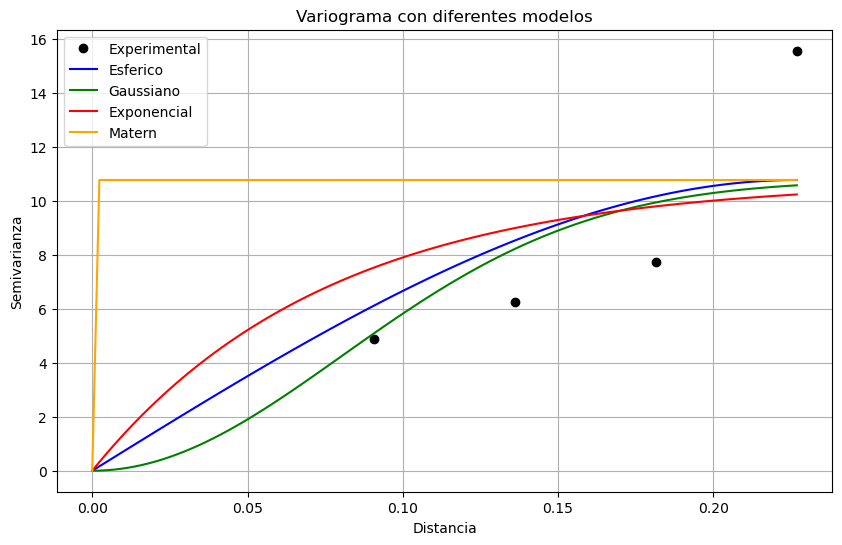

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(V.bins, V.experimental, 'o', label='Experimental', color='black')

colors = {
    'esferico': 'blue',
    'gaussiano': 'green',
    'exponencial': 'red',
    'matern': 'orange'
}

for model in ['esferico', 'gaussiano', 'exponencial', 'matern']:
    try:
        theo = models_dict[model](dist, sill, range_, nugget)
        plt.plot(dist, theo, label=model.capitalize(), color=colors[model])
    except ZeroDivisionError as e:
        print(f"Error in model {model}: {e}")

plt.xlabel('Distancia')
plt.ylabel('Semivarianza')
plt.title('Variograma con diferentes modelos')
plt.legend()
plt.grid(True)
plt.show()


## Covariogramas

In [41]:
mean = np.mean(values)

cov_models_dict = {
    'esferico': lambda h, sill, range_, nugget: sill - models.spherical(h, sill, range_, nugget) + mean,
    'gaussiano': lambda h, sill, range_, nugget: sill - models.gaussian(h, sill, range_, nugget) + mean,
    'exponencial': lambda h, sill, range_, nugget: sill - models.exponential(h, sill, range_, nugget) + mean,
    'matern': lambda h, sill, range_, nugget: sill - models.matern(h, sill, range_, nugget) + mean
}


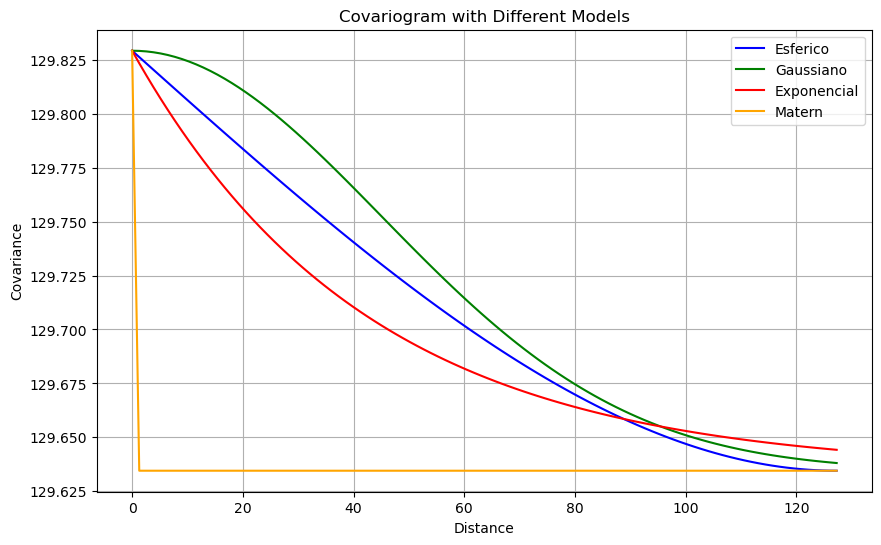

In [18]:
plt.figure(figsize=(10, 6))

for model in ['esferico', 'gaussiano', 'exponencial', 'matern']:
    try:
        cov_theo = cov_models_dict[model](dist, sill, range_, nugget)
        plt.plot(dist, cov_theo, label=model.capitalize(), color=colors[model])
    except ZeroDivisionError as e:
        print(f"Error in model {model}: {e}")

plt.xlabel('Distance')
plt.ylabel('Covariance')
plt.title('Covariogram with Different Models')
plt.legend()
plt.grid(True)
plt.show()